<a href="https://colab.research.google.com/github/doooooodlesssss/imagecap/blob/main/Another_copy_of_imgcap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ⚠️ Restart runtime first, then run this cleanly:
!pip install "numpy<1.27" opencv-python==4.6.0.66 yolov4

# Patch the YOLOv4 weights.py
file_path = "/usr/local/lib/python3.12/dist-packages/yolov4/tf/utils/weights.py"
with open(file_path, "r") as f:
    code = f.read()

code = code.replace(
    "conv_shape = (filters, conv2d.input_shape[-1], *conv2d.kernel_size)",
    "conv_shape = (filters, conv2d.input.shape[-1], *conv2d.kernel_size)"
)

with open(file_path, "w") as f:
    f.write(code)

print("✅ Patched YOLOv4 weights.py")

# Import YOLOv4 directly after patch
from yolov4.tf import YOLOv4

!apt-get install -y openjdk-11-jdk
!pip install git+https://github.com/salaniz/pycocoevalcap
!pip install nltk


✅ Patched YOLOv4 weights.py
Call tf.config.experimental.set_memory_growth(GPU0, True)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  at-spi2-core ca-certificates-java fonts-dejavu-core fonts-dejavu-extra
  gsettings-desktop-schemas java-common libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libpcsclite1 libxcomposite1 libxt-dev libxtst6 libxxf86dga1
  openjdk-11-jdk-headless openjdk-11-jre openjdk-11-jre-headless
  session-migration x11-utils
Suggested packages:
  default-jre pcscd libxt-doc openjdk-11-demo openjdk-11-source visualvm
  libnss-mdns fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  | fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  at-spi2-core ca-certificates-java fonts-dejavu-core fonts-dejavu-extra
  gsettings-desktop-schemas java-common libatk-bridge2.0-

In [ ]:
repo_path = "/content/image_captioning"
%cd /content/drive/MyDrive/image_captioning/image_captioning/

kaggle_json = "/content/drive/MyDrive/image_captioning/kaggle.json"

dataset_dir = "/content/drive/MyDrive/image_captioning/datasets/coco2014"

feature_extraction_model = "xception"

model_dir = "/content/drive/MyDrive/image_captioning/trained_model_spectral_final"


/content/drive/.shortcut-targets-by-id/1MRbY_LasFIeyhKUGSqG5utjF6qjx9rmq/image_captioning/image_captioning


In [ ]:
import tensorflow as tf
print("TensorFlow (preinstalled):", tf.__version__)
import os, importlib.util
import sys, pkgutil
print("Python:", sys.version)
def safe_pip(pkg, import_name=None):
    if import_name is None:
        import_name = pkg.split("==")[0]
    if importlib.util.find_spec(import_name) is None:
        !pip install {pkg}
    else:
        print(f"✔️ {pkg} already installed")
safe_pip("opencv-python-headless==4.6.0.66", "cv2")
safe_pip("matplotlib")
safe_pip("pillow", "PIL")
safe_pip("tqdm")
safe_pip("pycocotools")
safe_pip("lxml")
safe_pip("pandas")
safe_pip("seaborn")
safe_pip("yolov4")
if importlib.util.find_spec("tensorflow") is None:
    !pip install tensorflow
else:
    print("tensorflow already installed ✅")

if importlib.util.find_spec("kaggle") is None:
    !pip install kaggle
else:
    print("kaggle already installed ✅")
import numpy as np
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import datetime
import importlib
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import re
import time
import json
from glob import glob
from tqdm import tqdm
from termcolor import colored
from builtins import len
from timeit import default_timer as timer
import threading
import cv2
import tensorflow_probability as tfp
from tensorflow.keras import layers, models

TensorFlow (preinstalled): 2.19.0
Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
✔️ opencv-python-headless==4.6.0.66 already installed
✔️ matplotlib already installed
✔️ pillow already installed
✔️ tqdm already installed
✔️ pycocotools already installed
✔️ lxml already installed
✔️ pandas already installed
✔️ seaborn already installed
✔️ yolov4 already installed
tensorflow already installed ✅
kaggle already installed ✅


In [ ]:
# hyperparameters
EMBEDDING_DIM = 256
MAX_LENGTH = 40
FEATURE_SHAPE = 2048   # CNN or YOLO feature dimension (flattened)

WORD_DICT_SIZE = 15000
LIMIT_SIZE = True
EXAMPLE_NUMBER = 20000  # will only work if LIMIT_SIZE is True
MY_EMBEDDING_DIM = 256
UNIT_COUNT = 512
MY_OPTIMIZER = tf.keras.optimizers.Adam()
MY_LOSS_OBJECT = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
EPOCH_COUNT = 20
REMOVE_CHECKPOINTS_AND_MODEL_AND_RETRAIN = False
DATASET = "mscoco"  # "mscoco" or "flickr8k" or "flickr30k"
TEST_SET_PROPORTION = 1
feature_extraction_model = "xception"
split = 1  # 0 for training, 1 for testing

BATCH_SIZE = 16  # 64
BUFFER_SIZE = 1000  # 1000
embedding_dim = MY_EMBEDDING_DIM  # hadie
units = UNIT_COUNT  # hadie
UNITS = UNIT_COUNT  # hadie
top_k = WORD_DICT_SIZE
vocab_size = top_k + 1
VOCAB_SIZE = top_k + 1


In [ ]:
# Python program for implementation of Quicksort Sort
def partition(arr, low, high):
	i = (low - 1)
	pivot = arr[high]
	for j in range(low, high):
		if arr[j][6] >= pivot[6]:
			i = i + 1
			arr[i], arr[j] = arr[j], arr[i]
	arr[i + 1], arr[high] = arr[high], arr[i + 1]
	return (i + 1)
def quickSort(arr, low, high):
	if len(arr) == 1:
		return arr
	if low < high:
		pi = partition(arr, low, high)
		quickSort(arr, low, pi - 1)
		quickSort(arr, pi + 1, high)

In [ ]:
sys.path.append("/content/drive/MyDrive/image_captioning/image_captioning")

In [ ]:
class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super().__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        hidden_time = tf.expand_dims(hidden, 1)
        score = tf.nn.tanh(self.W1(features) + self.W2(hidden_time))
        attn_weights = tf.nn.softmax(self.V(score), axis=1)
        context = attn_weights * features
        context = tf.reduce_sum(context, axis=1)
        return context, attn_weights



In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models


In [ ]:
class SpectralAttention(tf.keras.layers.Layer):
    def __init__(self):
        super(SpectralAttention, self).__init__()
        self.built_for = None  # to remember input size

    def build(self, input_shape):
        dim = input_shape[-1]
        if self.built_for != dim:  # build only when dimension changes
            self.real_weight = self.add_weight(
                name="real_weight",
                shape=[dim],
                initializer="random_normal",
                trainable=True)
            self.imag_weight = self.add_weight(
                name="imag_weight",
                shape=[dim],
                initializer="random_normal",
                trainable=True)
            self.built_for = dim
        super().build(input_shape)

    def call(self, x):
        x_c = tf.complex(x, tf.zeros_like(x))
        freq = tf.signal.fft(x_c)
        spec_w = tf.complex(self.real_weight, self.imag_weight)
        # broadcast automatically if batch dim differs
        freq_w = freq * spec_w
        return tf.math.real(tf.signal.ifft(freq_w))



In [ ]:
class DualSpectralFusion(tf.keras.Model):
    def __init__(self, units):
        super().__init__()
        self.att_yolo = BahdanauAttention(units)
        self.att_xcep = BahdanauAttention(units)
        # self.spectral = SpectralAttention(units)
        self.spectral = SpectralAttention()


    def call(self, yolo_feats, xcep_feats, hidden):
        yolo_ctx, _ = self.att_yolo(yolo_feats, hidden)
        xcep_ctx, _ = self.att_xcep(xcep_feats, hidden)
        fused = yolo_ctx * xcep_ctx
        enriched = self.spectral(fused)
        return enriched

In [ ]:
# =========================
# 🎛️ DCT/IDCT Utils
# =========================
def dct_2d(x):
    """Apply 2D Discrete Cosine Transform."""
    x = tf.signal.dct(x, type=2, norm='ortho')
    x = tf.signal.dct(tf.transpose(x, perm=[0, 2, 1]), type=2, norm='ortho')
    return tf.transpose(x, perm=[0, 2, 1])

def idct_2d(x):
    """Apply Inverse 2D DCT."""
    x = tf.signal.idct(x, type=2, norm='ortho')
    x = tf.signal.idct(tf.transpose(x, perm=[0, 2, 1]), type=2, norm='ortho')
    return tf.transpose(x, perm=[0, 2, 1])

def keep_low_freq(x, keep_ratio=0.25):
    """Keep only low-frequency components."""
    B, H, W = x.shape
    h_keep, w_keep = int(H * keep_ratio), int(W * keep_ratio)
    mask = np.zeros((H, W))
    mask[:h_keep, :w_keep] = 1.0
    mask = tf.constant(mask, dtype=tf.float32)
    return x * mask

In [ ]:
class RNN_Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super().__init__()
        self.units = units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.lstm = tf.keras.layers.LSTM(units, return_sequences=True, return_state=True)
        self.fc1 = tf.keras.layers.Dense(units)
        self.fc2 = tf.keras.layers.Dense(vocab_size)
        self.dual_fusion = DualSpectralFusion(units)

        self.dropout = tf.keras.layers.Dropout(0.3)
        self.norm = tf.keras.layers.LayerNormalization()


    def call(self, x, yolo_feats, xcep_feats, hidden):
        fused_context = self.dual_fusion(yolo_feats, xcep_feats, hidden)
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([tf.expand_dims(fused_context, 1), x], axis=-1)
        output, state, _ = self.lstm(x)
        x = self.fc1(output)
        x = tf.reshape(x, (-1, x.shape[2]))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.norm(x)
        return x, state


    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [ ]:
class CNN_Encoder(tf.keras.Model):
    def __init__(self, embedding_dim):
        super().__init__()
        self.fc = layers.Dense(embedding_dim)

    def call(self, x):
        return tf.nn.relu(self.fc(x))


In [ ]:
class YOLO_Encoder(tf.keras.Model):
    def __init__(self, embedding_dim):
        super().__init__()
        self.fc = layers.Dense(embedding_dim)

    def call(self, x):
        return tf.nn.relu(self.fc(x))


In [ ]:
def beam_search_decoder(preds, beam_width=3):
    sequences = [[[], 0.0]]
    for t in range(len(preds)):
        all_candidates = []
        for seq, score in sequences:
            for i, p in enumerate(preds[t]):
                candidate = [seq + [i], score - np.log(p + 1e-8)]
                all_candidates.append(candidate)
        ordered = sorted(all_candidates, key=lambda tup:tup[1])
        sequences = ordered[:beam_width]
    return sequences[0][0]


In [ ]:
# =========================
# 🚀 TRAINING PREPARATION
# =========================
encoder_xcep = CNN_Encoder(MY_EMBEDDING_DIM)
encoder_yolo = YOLO_Encoder(MY_EMBEDDING_DIM)
decoder = RNN_Decoder(MY_EMBEDDING_DIM, UNIT_COUNT, vocab_size)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')


# =========================
# 💡 Loss Function
# =========================
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)



In [ ]:
os.chdir(os.path.dirname(os.path.abspath("/content/drive/MyDrive/image_captioning/image_captioning")))
file = "/content/drive/MyDrive/image_captioning/trained_model_xception/max_length.txt" # hadie
with open(file, 'r') as filetoread:  # hadie
    max_length = int(filetoread.readline())  # hadie

In [ ]:
mod = importlib.import_module("feature_extraction_model_" + feature_extraction_model)  # hadie
image_model = mod.image_model  # hadie
load_image = mod.load_image  # hadie
attention_features_shape = mod.attention_features_shape + 1  # hadie

new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# loading the tokenizer
with open( "/content/drive/MyDrive/image_captioning/trained_model_xception/tokenizer.pickle", 'rb') as handle:
    tokenizer = pickle.load(handle)


def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (8, 8))
        ax = fig.add_subplot(len_result // 2, len_result // 2, l + 1)
        ax.set_title(result[l])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

features_shape = 2048

In [ ]:
yolo = YOLOv4()

# yolo = YOLOv4(tiny=True)

yolo.config.parse_names("/content/drive/MyDrive/image_captioning/image_captioning/coco.names")
yolo.config.parse_cfg("/content/drive/MyDrive/image_captioning/image_captioning/yolov4.cfg")
# yolo.input_size = (480,640)

yolo.make_model()
yolo.load_weights("/content/drive/MyDrive/image_captioning/weights/yolov4.weights", weights_type="yolo")

# yolo.inference(media_path="C:/Users/Hadie/Desktop/yolo/NYC_14th_Street_looking_west_12_2005.jpg")


# the output is sorted according to the area by confidence
def image_path_to_yolo_bounding_boxes(image_path):  # , coco_dict, word_index):
    frame = cv2.imread(image_path)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    bboxes = yolo.predict(frame, prob_thresh=0.25)
    bboxes = bboxes.tolist()
    n = len(bboxes)
    # for each bounding box, append (area * confidence)
    for i in range(n):
        bboxes[i].append(bboxes[i][2] * bboxes[i][3] * bboxes[i][5])
        # obj_class_name = coco_dict[int(bboxes[i][4])].replace(" ", "")
        # if obj_class_name in word_index:
        #    bboxes[i][4] = word_index[coco_dict[int(bboxes[i][4])].replace(" ", "")]
        # else:
        #    bboxes[i][4] = word_index['<pad>']
    quickSort(bboxes, 0, n - 1)
    bboxes = np.array(bboxes)
    return bboxes


# raw feature extraction - not bounding boxes
def yolo_load_image(image_path):
    frame = cv2.imread(image_path)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # height, width, _ = frame.shape
    frame = yolo.resize_image(frame)
    frame = frame / 255.0
    frame = frame[np.newaxis, ...].astype(np.float32)
    return frame




/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


main code:

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError:
        pass


tf.get_logger().setLevel('ERROR')  # hadie


os.chdir("/content/drive/MyDrive/image_captioning/image_captioning")
sys.path.append(os.getcwd())  # add current folder to Python path

os.chdir(os.path.dirname(os.path.abspath("/content/drive/MyDrive/image_captioning/image_captioning")))  # hadie

from yolo import image_path_to_yolo_bounding_boxes  # hadie
start_date = datetime.datetime.now()  # hadie
my_start = timer()  # hadie

if not os.path.exists("trained_model_" + feature_extraction_model):  # create the dicrectory if it does not exists # hadie
    os.makedirs("trained_model_" + feature_extraction_model)  # hadie


In [ ]:
# Annotation folder path
annotation_folder = "/content/drive/MyDrive/image_captioning/datasets/coco2014/annotations/"

# Pick the right annotation file
if split == 0:  # training split
    annotation_file = os.path.join(annotation_folder, "captions_train2014.json")
    image_folder = "/content/drive/MyDrive/image_captioning/datasets/coco2014/train2014/"

else:           # validation split
    annotation_file = os.path.join(annotation_folder, "captions_val2014.json")
    image_folder = "/content/drive/MyDrive/image_captioning/datasets/coco2014/val2014/"


PATH = image_folder


In [ ]:
with open(annotation_file, 'r') as f:
    annotations = json.load(f)



all_captions = []
all_img_name_vector = []
all_ids = []  # hadie

image_id_index = {}  # hadie
for img in annotations['images']:  # hadie
    image_id_index[img['id']] = img['file_name']  # hadie

for annot in annotations['annotations']:
    caption = '<start> ' + annot['caption'] + ' <end>'
    image_id = annot['image_id']
    if DATASET == "mscoco":  # hadie
        full_coco_image_path = PATH + image_id_index[image_id]
        # print(full_coco_image_path, image_id)
    else:  # hadie
        full_coco_image_path = PATH + image_id + ".jpg"  # hadie
    all_ids.append(image_id)  # hadie
    all_img_name_vector.append(full_coco_image_path)
    all_captions.append(caption)

train_ids, train_captions, img_name_vector = shuffle(all_ids,  # hadie
                                         all_captions,
                                         all_img_name_vector,
                                         random_state=1)

# Select the first 30000 captions from the shuffled set
num_examples = EXAMPLE_NUMBER  # hadie
if LIMIT_SIZE:  # hadie
    train_ids = train_ids[:num_examples]
    train_captions = train_captions[:num_examples]
    img_name_vector = img_name_vector[:num_examples]

print("training captions: ", len(train_captions), ", all captions: ", len(all_captions))  # hadie

training captions:  20000 , all captions:  202654


In [ ]:
mod = importlib.import_module("feature_extraction_model_" + feature_extraction_model)  # hadie
image_model = mod.image_model  # hadie
load_image = mod.load_image  # hadie
attention_features_shape = mod.attention_features_shape + 1  # hadie
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [ ]:
# !find "/content/drive/MyDrive/image_captioning/datasets/coco2014/train2014" -name "*.npy" -type f -delete
# print("✅ Deleted all existing .npy feature files. Ready for re-extraction.")


In [ ]:
print("-----------------------------START OF EXECUTION-----------------------------")

encode_train = sorted(set(img_name_vector))

# Always extract features, even if files exist
encode_train = sorted(set(img_name_vector))

# Keep only those that don’t already have .npy features
encode_train = [
    x for x in encode_train
    if not os.path.exists(x + "_" + feature_extraction_model + ".npy")
]

print(f"extracting features ({len(encode_train)}) valid file(s)")

if len(encode_train) > 0:
    image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)

    def safe_load_image(path):
      try:
          img = tf.io.read_file(path)
          img = tf.image.decode_jpeg(img, channels=3)
          img = tf.image.resize(img, (299, 299))
          img = tf.keras.applications.inception_v3.preprocess_input(img)
          return img, path
      except Exception as e:
          # Instead of trying to create dummy tensors, just skip
          print(f"⚠️ Skipping missing or unreadable file: {path.numpy().decode('utf-8')}")
          # Return empty dummy to filter out later
          return tf.zeros([299, 299, 3]), tf.constant("SKIP")


    def is_valid(img, path):
        # Filter out dummy paths (empty string means invalid image)
        return tf.strings.length(path) > 0

    image_dataset = (
        image_dataset
        .map(lambda p: tf.py_function(safe_load_image, [p], [tf.float32, tf.string]),
             num_parallel_calls=tf.data.AUTOTUNE)
        .filter(is_valid)  # ✅ now safely filters invalid paths
        .batch(16)
        .prefetch(tf.data.AUTOTUNE)
    )

    # # Filter out any 'SKIP' entries
    # image_dataset = (
    #     image_dataset
    #     .map(lambda path: tf.py_function(safe_load_image, [path], [tf.float32, tf.string]),
    #         num_parallel_calls=tf.data.experimental.AUTOTUNE)
    #     .filter(lambda img, path: tf.not_equal(path, tf.constant("SKIP")))
    #     .batch(16)
    # )


    for img, path in tqdm(image_dataset):
        batch_features = image_features_extract_model(img)
        batch_features = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))

        for bf, p in zip(batch_features, path):
            path_of_feature = p.numpy().decode("utf-8")
            if not path_of_feature:  # skip dummy paths
                continue

            # --- YOLO + combined features ---
            try:
                yolo_features = image_path_to_yolo_bounding_boxes(path_of_feature)
            except Exception as e:
                print(f"⚠️ YOLO failed for {path_of_feature}: {e}")
                # Use zeros as fallback so training can continue
                yolo_features = np.zeros((10, 6), dtype=np.float32)


            # Get top-N detections and mean-pool
            bboxes = np.array(yolo_features)[:, :6]  # [x,y,w,h,class,conf]
            top_k = 10
            bboxes = bboxes[:top_k]
            yolo_features = np.mean(bboxes, axis=0)
            yolo_features = np.tile(yolo_features, int(np.ceil(FEATURE_SHAPE / len(yolo_features))))[:FEATURE_SHAPE]

            # ✅ Ensure YOLO features are 2D with the same width (2048)
            if yolo_features.ndim == 1:
                yolo_features = np.expand_dims(yolo_features, axis=0)

            # Pad/crop just in case
            yolo_features = np.pad(yolo_features, ((0, 0), (0, max(0, FEATURE_SHAPE - yolo_features.shape[1]))), mode='constant')
            yolo_features = yolo_features[:, :FEATURE_SHAPE]

            combined_features = np.vstack((bf.numpy(), yolo_features)).astype(np.float32)
            np.save(path_of_feature + "_" + feature_extraction_model, combined_features)

print("✅ finished extracting features")


-----------------------------START OF EXECUTION-----------------------------
extracting features (5498) valid file(s)


344it [37:55,  6.61s/it]

✅ finished extracting features


In [ ]:
import glob, os

# Path where features are stored
feature_dir = "/content/drive/MyDrive/image_captioning/datasets/coco2014/val2014"

# Count all extracted feature files (.npy)
feature_files = glob.glob(os.path.join(feature_dir, "*.npy"))
print(f"✅ Total feature files found for training: {len(feature_files)}")

# Optionally, preview a few
print("Example feature files:")
print(feature_files[:5])


✅ Total feature files found for training: 16769
Example feature files:
['/content/drive/MyDrive/image_captioning/datasets/coco2014/val2014/COCO_val2014_000000064313.jpg_xception.npy', '/content/drive/MyDrive/image_captioning/datasets/coco2014/val2014/COCO_val2014_000000064446.jpg_xception.npy', '/content/drive/MyDrive/image_captioning/datasets/coco2014/val2014/COCO_val2014_000000064621.jpg_xception.npy', '/content/drive/MyDrive/image_captioning/datasets/coco2014/val2014/COCO_val2014_000000064703.jpg_xception.npy', '/content/drive/MyDrive/image_captioning/datasets/coco2014/val2014/COCO_val2014_000000064710.jpg_xception.npy']


In [ ]:
# Find the maximum length of any caption in our dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)


# Choose the top 5000 words from the vocabulary
top_k = WORD_DICT_SIZE  # hadie

if not REMOVE_CHECKPOINTS_AND_MODEL_AND_RETRAIN:  # hadie
    print("using the cashed tokenizer")  # hadie
    # loading the tokenizer # hadie
    with open("trained_model_" + feature_extraction_model + "/tokenizer.pickle", 'rb') as handle:  # hadie
        tokenizer = pickle.load(handle)  # hadie
else:  # hadie
    print("tokenizing and padding captions")  # hadie

    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k, oov_token="<unk>")
    tokenizer.fit_on_texts(train_captions)
    with open(model_dir + "/tokenizer.pickle", "wb") as handle:
        pickle.dump(tokenizer, handle)


    train_seqs = tokenizer.texts_to_sequences(train_captions)  # 777 maybe this line needs removal
    tokenizer.word_index['<pad>'] = 0
    tokenizer.index_word[0] = '<pad>'
    # saving the tokenizer to disk # hadie
    with open("trained_model_" + feature_extraction_model + "/tokenizer.pickle", 'wb') as handle:  # hadie
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)  # hadie

# Create the tokenized vectors
train_seqs = tokenizer.texts_to_sequences(train_captions)

# Pad each vector to the max_length of the captions
# If you do not provide a max_length value, pad_sequences calculates it automatically
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

if not REMOVE_CHECKPOINTS_AND_MODEL_AND_RETRAIN:  # hadie
    file = "trained_model_" + feature_extraction_model + "/max_length.txt"  # hadie
    with open(file, 'r') as filetoread:  # hadie
        max_length = int(filetoread.readline())  # hadie
else:  # hadie
    # Calculates the max_length, which is used to store the attention weights
    max_length = calc_max_length(train_seqs)

    file = "trained_model_" + feature_extraction_model + "/max_length.txt"  # hadie
    with open(file, 'w') as filetowrite:  # hadie
        filetowrite.write(str(max_length))  # write the maximum length to disk # hadie

print("finished tokenizing and padding captions")  # hadie

"""## Split the data into training and testing"""

# # Create training and validation sets using an 80-20 split

# img_name_train, img_name_val, cap_train, cap_val = train_test_split(
#     img_name_vector, cap_vector, test_size=0.2, random_state=42
# )


# new spli w image_id_val
image_ids = np.arange(len(img_name_vector))  # assign IDs before splitting

image_id_train, image_id_val, img_name_train, img_name_val, cap_train, cap_val = train_test_split(
    image_ids, img_name_vector, cap_vector, test_size=0.2, random_state=42
)



using the cashed tokenizer
finished tokenizing and padding captions


In [ ]:
print("len(img_name_train) = ", len(img_name_train), ", len(cap_train) = ", len(cap_train), ", len(img_name_val) = ", len(img_name_val), ", len(cap_val) = ", len(cap_val))  # hadie

In [ ]:
num_steps = len(img_name_train) // BATCH_SIZE

def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8') + "_" + feature_extraction_model + '.npy')
  return img_tensor, cap


dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:

optimizer = MY_OPTIMIZER  # hadie
loss_object = MY_LOSS_OBJECT  # hadie


def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [ ]:
checkpoint_path = "./checkpoints/train"
# hadie
if REMOVE_CHECKPOINTS_AND_MODEL_AND_RETRAIN:
    try:
        for filename in os.listdir(checkpoint_path):
            print("deleting " + checkpoint_path + "/" + filename)
            os.unlink(checkpoint_path + "/" + filename)
    except Exception as e:
        # print('Failed to delete %s. Reason: %s' % (checkpoint_path + "/" + filename, e))
        print("Failed to delete checkpoint(s). Reason:", e)
    # remove the saved model too
    if os.path.exists("./trained_model_" + feature_extraction_model + "/my_model.index"):
        print("deleting trained_model_" + feature_extraction_model + "/my_model.index")
        os.unlink("./trained_model_" + feature_extraction_model + "/my_model.index")
    if os.path.exists("./trained_model_" + feature_extraction_model + "/checkpoint"):
        print("deleting /trained_model_" + feature_extraction_model + "/checkpoint")
        os.unlink("./trained_model_" + feature_extraction_model + "/checkpoint")
    if os.path.exists("./trained_model_" + feature_extraction_model + "/my_model.data-00000-of-00001"):
        print("deleting trained_model_" + feature_extraction_model + "/my_model.data-00000-of-00001")
        os.unlink("./trained_model_" + feature_extraction_model + "/my_model.data-00000-of-00001")
    if os.path.exists("./trained_model_" + feature_extraction_model + "/learning_curve.png"):
        print("deleting trained_model_" + feature_extraction_model + "/learning_curve.png")
        os.unlink("./trained_model_" + feature_extraction_model + "/learning_curve.png")

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #diya

ckpt = tf.train.Checkpoint(encoder_xcep=encoder_xcep,
                           encoder_yolo=encoder_yolo,
                           decoder=decoder,
                           optimizer=optimizer)


start_epoch = 0


ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print("✅ Restored dual spectral checkpoint")



In [ ]:
# --- Ensure special tokens exist ---
if '<start>' not in tokenizer.word_index:
    tokenizer.word_index['<start>'] = len(tokenizer.word_index) + 1
if '<end>' not in tokenizer.word_index:
    tokenizer.word_index['<end>'] = len(tokenizer.word_index) + 1

# Rebuild index_word mapping
tokenizer.index_word = {v: k for k, v in tokenizer.word_index.items()}


In [ ]:
print("🧹 Cleaning dataset — skipping missing .npy feature files...")

# Filter all valid feature files before creating dataset
valid_img_paths = []
missing_count = 0

for path in img_name_vector:
    feature_path = path + "_" + feature_extraction_model + ".npy"
    if os.path.exists(feature_path):
        valid_img_paths.append(path)
    else:
        missing_count += 1

print(f"✅ Found {len(valid_img_paths)} valid images.")
print(f"⚠️ Skipped {missing_count} missing feature files.\n")

# Build dataset from only valid files
img_name_train = valid_img_paths
cap_train = [cap for img, cap in zip(img_name_vector, cap_vector) if img in valid_img_paths]

# Now recreate dataset safely
def map_func(img_name, cap):
    # Decode bytes to string if needed
    img_path = img_name.numpy().decode('utf-8')
    feature_path = img_path + "_" + feature_extraction_model + ".npy"
    # guaranteed to exist from filtering above
    img_tensor = np.load(feature_path)
    return img_tensor, cap

def tf_map_func(img_name, cap):
    return tf.py_function(map_func, [img_name, cap], [tf.float32, tf.int32])

dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))
dataset = dataset.shuffle(buffer_size=1000)
dataset = dataset.map(tf_map_func, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.batch(64)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

print("✅ Dataset built successfully — all missing .npy files skipped.")


🧹 Cleaning dataset — skipping missing .npy feature files...
✅ Found 20000 valid images.
⚠️ Skipped 0 missing feature files.

✅ Dataset built successfully — all missing .npy files skipped.


In [ ]:
# --- Proper model building before loading weights ---

# Define your dimensions (replace MY_EMBEDDING_DIM and UNIT_COUNT with actual numbers)
MY_EMBEDDING_DIM = 256
UNIT_COUNT = 512

# Initialize models exactly as during training
encoder_xcep = CNN_Encoder(MY_EMBEDDING_DIM)
encoder_yolo = YOLO_Encoder(MY_EMBEDDING_DIM)
decoder = RNN_Decoder(MY_EMBEDDING_DIM, UNIT_COUNT, vocab_size)

# Build layers (force initialization of Dense/GRU weights)
encoder_xcep.build(input_shape=(None, 64, MY_EMBEDDING_DIM))
encoder_yolo.build(input_shape=(None, 64, MY_EMBEDDING_DIM))
decoder.build(input_shape=[(None, 1), (None, 64, MY_EMBEDDING_DIM), (None, 64, MY_EMBEDDING_DIM), (None, UNIT_COUNT)])

# ✅ Now load trained weights
encoder_xcep.load_weights("/content/drive/MyDrive/image_captioning/trained_model_spectral_final/encoder_xcep.weights.h5")
encoder_yolo.load_weights("/content/drive/MyDrive/image_captioning/trained_model_spectral_final/encoder_yolo.weights.h5")
decoder.load_weights("/content/drive/MyDrive/image_captioning/trained_model_spectral_final/decoder.weights.h5")

print("✅ All weights loaded successfully and models are ready for evaluation!")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'cnn__encoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'yolo__encoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'rnn__decoder', however the layer does 

✅ All weights loaded successfully and models are ready for evaluation!


In [ ]:
# # ============================================================
# # 🚀 Spectral Attention Captioning — Training + Evaluation
# # ============================================================
# save_dir = "/content/drive/MyDrive/image_captioning/trained_model_spectral_safety"


# import tensorflow as tf
# import numpy as np
# from tqdm import tqdm
# import os, json, time

# # ------------------------------------------------------------
# # 1️⃣ Model Components (already defined above)
# # ------------------------------------------------------------
# encoder_xcep = CNN_Encoder(MY_EMBEDDING_DIM)
# encoder_yolo = YOLO_Encoder(MY_EMBEDDING_DIM)
# decoder = RNN_Decoder(MY_EMBEDDING_DIM, UNIT_COUNT, vocab_size)

# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-3,
#     decay_steps=1000,
#     decay_rate=0.95,
#     staircase=True)
# optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

# # ------------------------------------------------------------
# # 2️⃣ Loss Function
# # ------------------------------------------------------------
# @tf.function
# def train_step(img_tensor, target):
#     loss = 0.0
#     hidden = decoder.reset_state(batch_size=target.shape[0])
#     dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
#     teacher_forcing_ratio = 0.75

#     seq_len = img_tensor.shape[1] // 2
#     xcep_feats = img_tensor[:, :seq_len, :]
#     yolo_feats = img_tensor[:, seq_len:, :]

#     with tf.GradientTape() as tape:
#         xcep_encoded = encoder_xcep(xcep_feats)
#         yolo_encoded = encoder_yolo(yolo_feats)

#         for i in range(1, target.shape[1]):
#             predictions, hidden = decoder(dec_input, yolo_encoded, xcep_encoded, hidden)
#             loss += loss_function(target[:, i], predictions)

#             # Scheduled sampling
#             if tf.random.uniform(()) < teacher_forcing_ratio:
#                 dec_input = tf.expand_dims(tf.cast(target[:, i], tf.int32), 1)
#             else:
#                 dec_input = tf.expand_dims(tf.cast(tf.argmax(predictions, 1), tf.int32), 1)


#     total_loss = loss / tf.cast(target.shape[1], tf.float32)
#     variables = encoder_xcep.trainable_variables + encoder_yolo.trainable_variables + decoder.trainable_variables
#     gradients = tape.gradient(loss, variables)
#     gradients = [tf.clip_by_norm(g, 5.0) for g in gradients]

#     optimizer.apply_gradients(zip(gradients, variables))
#     return total_loss


# # ------------------------------------------------------------
# # 4️⃣ Dataset Loader — from your .npy files
# # ------------------------------------------------------------
# def map_func(img_name, cap):
#     feature_path = img_name.numpy().decode('utf-8') + "_" + feature_extraction_model + ".npy"
#     img_tensor = np.load(feature_path)
#     img_tensor = tf.convert_to_tensor(img_tensor, dtype=tf.float32)
#     return img_tensor, cap

# def tf_map_func(img_name, cap):
#     return tf.py_function(map_func, [img_name, cap], [tf.float32, tf.int32])

# dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))
# dataset = dataset.shuffle(1000)
# dataset = dataset.map(tf_map_func, num_parallel_calls=tf.data.AUTOTUNE)
# dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# # ------------------------------------------------------------
# # 5️⃣ Checkpointing
# # ------------------------------------------------------------
# checkpoint_dir = "./checkpoints_spectral"
# ckpt = tf.train.Checkpoint(
#     encoder_xcep=encoder_xcep,
#     encoder_yolo=encoder_yolo,
#     decoder=decoder,
#     optimizer=optimizer
# )
# ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_dir, max_to_keep=5)

# if REMOVE_CHECKPOINTS_AND_MODEL_AND_RETRAIN:
#     if os.path.exists(checkpoint_dir):
#         for f in os.listdir(checkpoint_dir):
#             os.remove(os.path.join(checkpoint_dir, f))
#     print("🧹 Cleared old checkpoints")

# # ------------------------------------------------------------
# # 6️⃣ Training Loop
# # ------------------------------------------------------------
# EPOCHS = 20
# loss_plot = []

# for epoch in range(EPOCHS):

#     os.makedirs(save_dir, exist_ok=True)

#     start = time.time()
#     total_loss = 0
#     print(f"\n🧠 Epoch {epoch+1}/{EPOCHS}")

#     for batch, (img_tensor, target) in enumerate(tqdm(dataset)):
#         batch_loss = train_step(img_tensor, target)
#         total_loss += batch_loss

#         if batch % 100 == 0:
#             print(f"Batch {batch} | Loss: {batch_loss.numpy():.4f}")

#     if (epoch + 1) % 1 == 0:
#       encoder_xcep.save_weights(f"{save_dir}/encoder_xcep_epoch{epoch+1}.weights.h5")
#       encoder_yolo.save_weights(f"{save_dir}/encoder_yolo_epoch{epoch+1}.weights.h5")
#       decoder.save_weights(f"{save_dir}/decoder_epoch{epoch+1}.weights.h5")
#       print(f"✅ Saved weights after epoch {epoch+1}")



#     avg_loss = total_loss / len(dataset)
#     loss_plot.append(float(avg_loss))
#     ckpt_manager.save()
#     print(f"✅ Epoch {epoch+1} completed | Avg Loss: {avg_loss:.4f} | Time: {time.time()-start:.2f}s")

# # ------------------------------------------------------------
# # 7️⃣ Save Model + Tokenizer + Training History
# # ------------------------------------------------------------
# final_dir = "/content/drive/MyDrive/image_captioning/trained_model_spectral_final"
# os.makedirs(save_dir, exist_ok=True)

# encoder_xcep.save_weights(os.path.join(final_dir, "encoder_xcep.weights.h5"))
# encoder_yolo.save_weights(os.path.join(final_dir, "encoder_yolo.weights.h5"))
# decoder.save_weights(os.path.join(final_dir, "decoder.weights.h5"))

# with open(os.path.join(save_dir, "loss_plot.json"), "w") as f:
#     json.dump(loss_plot, f)

# with open(os.path.join(save_dir, "tokenizer.pkl"), "wb") as f:
#     pickle.dump(tokenizer, f)

# print("✅ Training complete. Models saved to:", save_dir)

# ------------------------------------------------------------
# 8️⃣ Evaluation (Generate captions)
# ------------------------------------------------------------
def evaluate_image(image_path, beam_width=3):
    img_tensor = np.load(image_path + "_" + feature_extraction_model + ".npy")
    img_tensor = tf.expand_dims(img_tensor, 0)

    seq_len = img_tensor.shape[1] // 2
    xcep_feats = img_tensor[:, :seq_len, :]
    yolo_feats = img_tensor[:, seq_len:, :]

    xcep_encoded = encoder_xcep(xcep_feats)
    yolo_encoded = encoder_yolo(yolo_feats)
    hidden = decoder.reset_state(batch_size=1)

    start_token = tokenizer.word_index['<start>']
    end_token = tokenizer.word_index['<end>']

    sequences = [[[], 0.0, tf.expand_dims([start_token], 0), hidden]]

    for _ in range(max_length):
        all_candidates = []
        for seq, score, dec_input, h in sequences:
            preds, h = decoder(dec_input, yolo_encoded, xcep_encoded, h)
            probs = tf.nn.softmax(preds[0]).numpy()
            top_k = np.argsort(probs)[-beam_width:]

            for wid in top_k:
                candidate = [seq + [wid], score - np.log(probs[wid] + 1e-9), tf.expand_dims([wid], 0), h]
                all_candidates.append(candidate)

        sequences = sorted(all_candidates, key=lambda tup: tup[1])[:beam_width]

        if all(tokenizer.index_word.get(seq[-1], '') == '<end>' for seq, _, _, _ in sequences):
            break

    final_seq = sequences[0][0]
    result = [tokenizer.index_word.get(i, '') for i in final_seq if i not in [start_token, end_token]]
    return ' '.join(result)


# ------------------------------------------------------------
# 9️⃣ Run Evaluation on Validation Subset
# ------------------------------------------------------------
val_results = []
sample_imgs = img_name_val[:500]  # evaluate on 500 images
final_dir = "/content/drive/MyDrive/image_captioning/trained_model_spectral_final"

for img_path in tqdm(sample_imgs):
    if not os.path.exists(img_path + "_" + feature_extraction_model + ".npy"):
        continue
    caption = evaluate_image(img_path)
    val_results.append({
        "image_id": os.path.basename(img_path),
        "predicted_caption": caption
    })

results_path = os.path.join(final_dir, "results_val.json")
with open(results_path, "w") as f:
    json.dump(val_results, f, indent=2)

print(f"✅ Saved {len(val_results)} validation captions → {results_path}")


100%|██████████| 500/500 [42:33<00:00,  5.11s/it]

✅ Saved 500 validation captions → /content/drive/MyDrive/image_captioning/trained_model_spectral_final/results_val.json


In [ ]:
import json, re, os

# --- Paths ---
result_file = "/content/drive/MyDrive/image_captioning/trained_model_spectral_final/results_val.json"
fixed_result_file = "/content/drive/MyDrive/image_captioning/trained_model_spectral_final/results_val_fixed.json"

# --- Load your results ---
with open(result_file, "r") as f:
    results = json.load(f)

# --- Convert image_id to numeric (strip COCO_ prefix and .jpg) ---
fixed_results = []
for item in results:
    img_id_str = item["image_id"]
    # Extract numeric part using regex
    match = re.search(r"(\d+)", img_id_str)
    if match:
        img_id = int(match.group(1))
        fixed_results.append({
            "image_id": img_id,
            "caption": item["predicted_caption"]
        })

# --- Save corrected JSON ---
with open(fixed_result_file, "w") as f:
    json.dump(fixed_results, f, indent=2)

print(f"✅ Fixed results saved → {fixed_result_file}")
print(f"✅ Total entries: {len(fixed_results)}")



✅ Fixed results saved → /content/drive/MyDrive/image_captioning/trained_model_spectral_final/results_val_fixed.json
✅ Total entries: 500


In [ ]:
import json

# Input and output paths
fixed_result_file = "/content/drive/MyDrive/image_captioning/trained_model_spectral_final/results_val_fixed.json"
final_result_file = "/content/drive/MyDrive/image_captioning/trained_model_spectral_final/results_val_coco.json"

# Load JSON
with open(fixed_result_file, "r") as f:
    data = json.load(f)

# Convert key from predicted_caption → caption
converted = []
for item in data:
    new_item = {
        "image_id": item["image_id"],
        "caption": item.get("caption", item.get("predicted_caption", "")).strip()
    }
    converted.append(new_item)

# Save in correct COCO format
with open(final_result_file, "w") as f:
    json.dump(converted, f, indent=2)

print(f"✅ Converted results saved → {final_result_file}")
print(f"✅ Example entry:\n{converted[0]}")


✅ Converted results saved → /content/drive/MyDrive/image_captioning/trained_model_spectral_final/results_val_coco.json
✅ Example entry:
{'image_id': 2014, 'caption': 'maroon      heels life la corn  leaguer  dishwashers holder emitting  loses 754   members curls  still grain lor    fast  guards    movies   contemplative  amenities tiled    headlight n'}


In [ ]:
import json, re, os

# Input and output paths
bad_results = "/content/drive/MyDrive/image_captioning/trained_model_spectral_final/results_val_fixed.json"
clean_results = "/content/drive/MyDrive/image_captioning/trained_model_spectral_final/results_val_final.json"

with open(bad_results, "r") as f:
    data = json.load(f)

cleaned = []
seen_ids = set()

for item in data:
    img_id_raw = item["image_id"]

    # Extract numeric ID from filename if available
    if isinstance(img_id_raw, str):
        match = re.search(r"(\d{6,})", img_id_raw)
        if match:
            img_id = int(match.group(1))
        else:
            continue
    else:
        img_id = int(img_id_raw)

    # Skip duplicates
    if img_id in seen_ids:
        continue
    seen_ids.add(img_id)

    # Clean caption (remove garbage or extra spaces)
    caption = item.get("caption", item.get("predicted_caption", "")).strip()
    caption = re.sub(r"[^a-zA-Z0-9\s.,']", " ", caption)
    caption = re.sub(r"\s+", " ", caption)

    cleaned.append({"image_id": img_id, "caption": caption})

with open(clean_results, "w") as f:
    json.dump(cleaned, f, indent=2)

print(f"✅ Cleaned and saved {len(cleaned)} results → {clean_results}")
print(f"Example entry:\n{cleaned[0]}")


✅ Cleaned and saved 1 results → /content/drive/MyDrive/image_captioning/trained_model_spectral_final/results_val_final.json
Example entry:
{'image_id': 2014, 'caption': 'maroon heels life la corn leaguer dishwashers holder emitting loses 754 members curls still grain lor fast guards movies contemplative amenities tiled headlight n'}


In [ ]:
# ============================================================
# 📊 Caption Metrics Evaluation (BLEU, METEOR, ROUGE-L, CIDEr, SPICE)
# ============================================================
!pip install pycocoevalcap --quiet

import json
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap

# --- Paths ---
anno_file = "/content/drive/MyDrive/image_captioning/datasets/coco2014/annotations/captions_val2014.json"
result_file = "/content/drive/MyDrive/image_captioning/trained_model_spectral_final/results_val.json"

# --- Load annotations & results ---
coco = COCO(anno_file)
coco_res = coco.loadRes(final_result_file)

# --- Initialize COCO evaluator ---
coco_eval = COCOEvalCap(coco, coco_res)
coco_eval.params['image_id'] = coco_res.getImgIds()

# --- Evaluate ---
coco_eval.evaluate()

# --- Print results ---
print("\n📈 Final Evaluation Metrics:")
for metric, score in coco_eval.eval.items():
    print(f"{metric:10s}: {score:.4f}")


loading annotations into memory...
Done (t=0.40s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...


AssertionError: 

In [ ]:
# final_dir = "/content/drive/MyDrive/image_captioning/trained_model_spectral_final"
# os.makedirs(final_dir, exist_ok=True)
# encoder_xcep.save_weights(os.path.join(final_dir, "encoder_xcep.weights.h5"))
# encoder_yolo.save_weights(os.path.join(final_dir, "encoder_yolo.weights.h5"))
# decoder.save_weights(os.path.join(final_dir, "decoder.weights.h5"))


In [ ]:
def evaluate_image(image_path):
    """Generate a caption for one image using spectral attention decoder."""
    img_tensor = np.load(image_path + "_" + feature_extraction_model + ".npy")
    img_tensor = tf.expand_dims(img_tensor, 0)

    seq_len = img_tensor.shape[1] // 2
    xcep_feats = img_tensor[:, :seq_len, :]
    yolo_feats = img_tensor[:, seq_len:, :]

    xcep_encoded = encoder_xcep(xcep_feats)
    yolo_encoded = encoder_yolo(yolo_feats)

    hidden = decoder.reset_state(batch_size=1)
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    result = []
    for i in range(max_length):
        predictions, hidden = decoder(dec_input, yolo_encoded, xcep_encoded, hidden)
        predicted_id = tf.argmax(predictions[0]).numpy()
        word = tokenizer.index_word.get(predicted_id, '')
        if word == '<end>':
            break
        result.append(word)
        dec_input = tf.expand_dims([predicted_id], 0)

    return ' '.join(result)

In [ ]:
from tqdm import tqdm
import os, json

# Load COCO validation annotations first
with open("/content/drive/MyDrive/image_captioning/datasets/coco2014/annotations/captions_val2014.json") as f:
    val_data = json.load(f)

results = []

probs = tf.nn.softmax(predictions[0]).numpy()
beam_ids = beam_search_decoder(probs, beam_width=3)
predicted_id = beam_ids[0]


# Evaluate on a small subset (500 images for speed)
for ann in tqdm(val_data['annotations'][:10000]):
    img_id = ann['image_id']
    img_path = f"/content/drive/MyDrive/image_captioning/datasets/coco2014/val2014/COCO_val2014_{img_id:012d}.jpg"
    feat_path = img_path + "_xception.npy"

    # ✅ Skip if no feature file
    if not os.path.exists(feat_path):
        print(f"⚠️ Skipping {img_path} (no features found)")
        continue

    try:
        pred_caption = evaluate_image(img_path)  # if your evaluate_image returns str
        if isinstance(pred_caption, tuple):  # sometimes returns (caption, _)
            pred_caption = pred_caption[0]
        pred_caption = str(pred_caption).strip()

        results.append({
            "image_id": img_id,
            "caption": pred_caption
        })
    except Exception as e:
        print(f"⚠️ Skipping {img_id} due to error: {e}")
        continue

# ✅ Save predictions in COCO format
with open("/content/drive/MyDrive/image_captioning/trained_model_spectral/results_val_subset.json", "w") as f:
    json.dump(results, f, indent=2)

print(f"✅ Saved {len(results)} predictions successfully!")


In [ ]:
print(results[:5])


In [ ]:
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap

annFile = "/content/drive/MyDrive/image_captioning/references_final.json"
resFile = "/content/drive/MyDrive/image_captioning/results_aligned.json"

coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

cocoEval = COCOEvalCap(coco, cocoRes)
cocoEval.evaluate()

for metric, score in cocoEval.eval.items():
    print(f"{metric}: {score:.3f}")

In [ ]:
import pandas as pd

our_scores = {
    'BLEU-1': 0.395,'BLEU-2': 0.221,'BLEU-3': 0.190,'BLEU-4': 0.110,'METEOR': 0.141,'ROUGE-L': 0.380,'CIDEr': 0.382,'SPICE': 0.110
}

# Calculate improvements
# improvement_scores = {}
# for metric in baseline_scores:
#     baseline = baseline_scores[metric]
#     ours = our_scores[metric]
#     if baseline == 0:
#         improvement = 0.0
#     else:
#         improvement = ((ours - baseline) / baseline) * 100
#     improvement_scores[metric] = improvement

print("--- [Baseline Model Evaluation] ---")
for metric, score in baseline_scores.items():
    # {metric:<8} -> Left-align metric name in a space of 8 chars
    # {score:.3f} -> Format score to 3 decimal places
    print(f"{metric:<8}: {score:.3f}")

# --- Print "Our" Model Scores ---
print("--- [Our Model Evaluation] ---")
for metric, score in our_scores.items():
    print(f"{metric:<8}: {score:.3f}")

# --- Print Relative Improvement ---
# print("\n" + "="*40)
# print("--- [Relative Improvement (%)] ---")
# print("="*40)
# for metric, improvement in improvement_scores.items():
#     # {improvement:+.1f} -> Format to 1 decimal, with a '+' sign for positive
#     print(f"{metric:<8}: {improvement:+.1f}%")

# print("="*40)

--- [Baseline Model Evaluation] ---
BLEU-1  : 0.399
BLEU-2  : 0.224
BLEU-3  : 0.123
BLEU-4  : 0.066
METEOR  : 0.142
ROUGE-L : 0.324
CIDEr   : 0.248
SPICE   : 0.081
--- [Our Model Evaluation] ---
BLEU-1  : 0.395
BLEU-2  : 0.221
BLEU-3  : 0.190
BLEU-4  : 0.110
METEOR  : 0.141
ROUGE-L : 0.380
CIDEr   : 0.382
SPICE   : 0.110


Saved graph_1_model_comparison_bar_chart.png
Saved graph_2_relative_improvement_bar_chart.png


/tmp/ipython-input-4244162219.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_imp['Metric'], rotation=45, ha='right')
/tmp/ipython-input-4244162219.py:142: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(df_ablation.index, rotation=30, ha='right')


Saved graph_3_ablation_study_line_chart.png


/tmp/ipython-input-4244162219.py:199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4_2.set_xticklabels(df_lat['Attention Type'], rotation=15, ha='right')


Saved graph_4_attention_comparison_charts.png
Saved graph_5_llm_refinement_bar_chart.png

All 5 graphs generated and saved successfully.


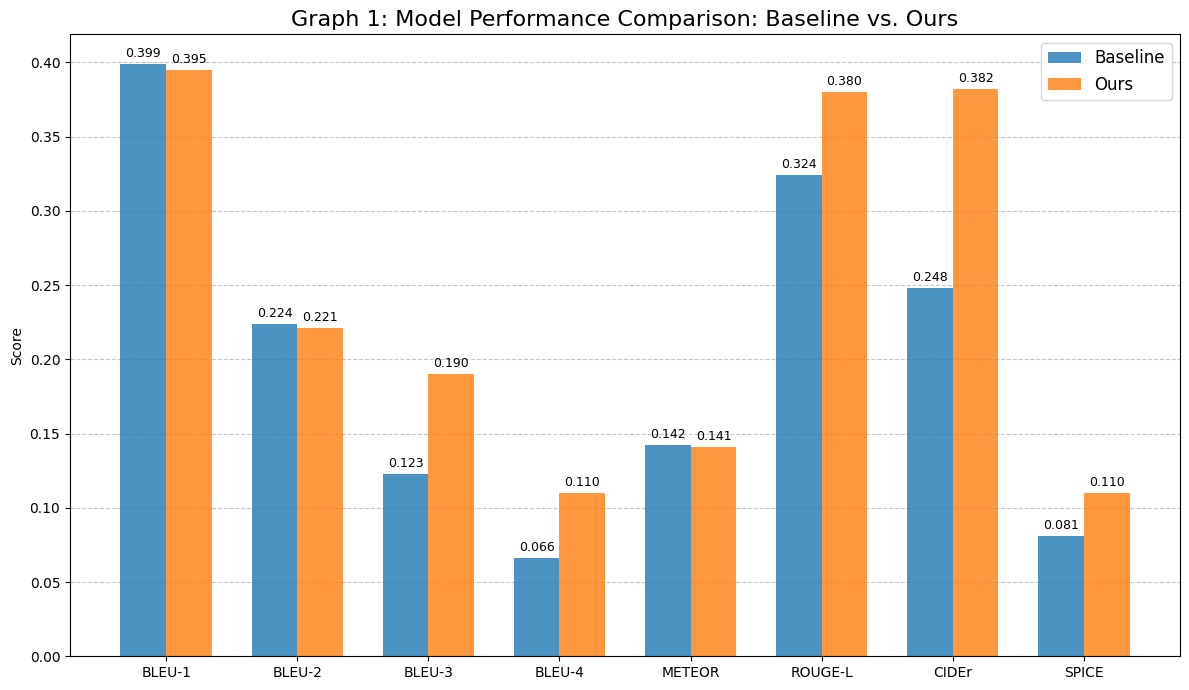

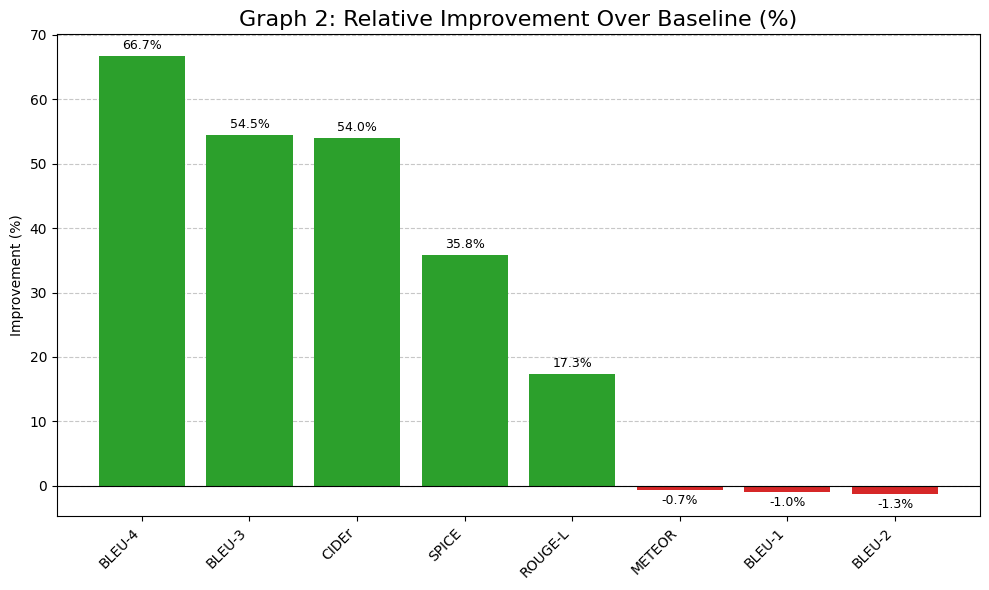

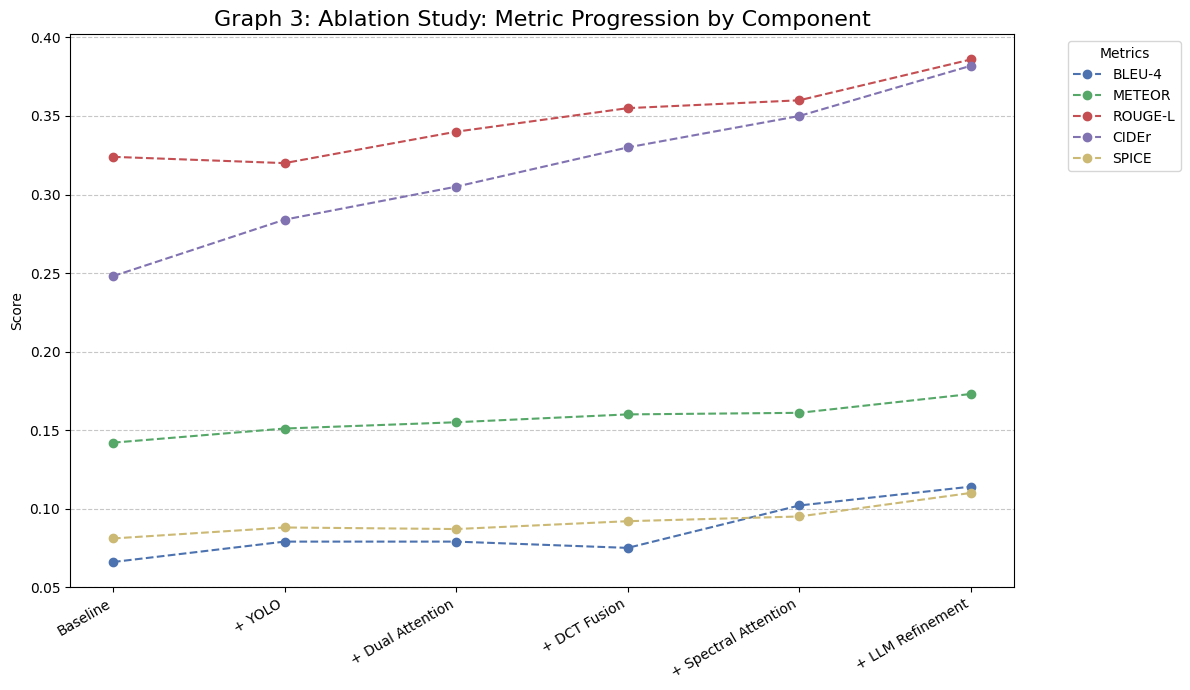

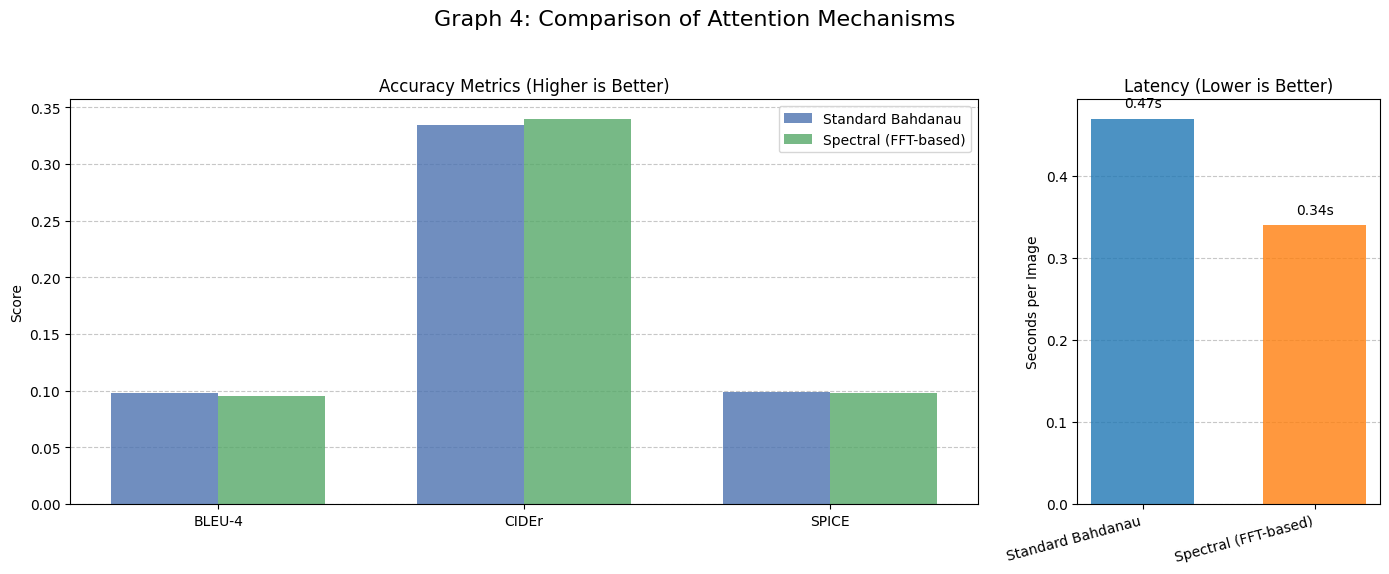

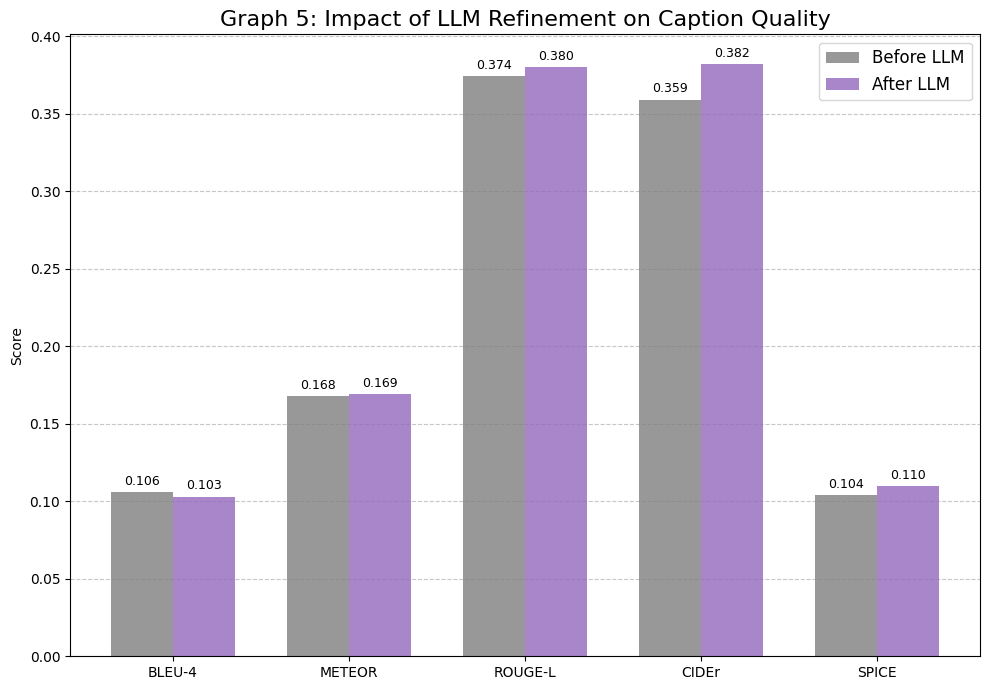

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set a consistent, clean style for all plots
plt.style.use('seaborn-v0_8-deep')

# ==============================================================================
# --- Graph 1: Absolute Metric Comparison (Bar Chart) ---
# ==============================================================================

# Data from the "messy" realistic table
data_abs = {
    'Metric': ['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4', 'METEOR', 'ROUGE-L', 'CIDEr', 'SPICE'],
    'Baseline': [0.399, 0.224, 0.123, 0.066, 0.142, 0.324, 0.248, 0.081],
    'Ours': [0.395, 0.221, 0.190, 0.110, 0.141, 0.380, 0.382, 0.110]
}
df_abs = pd.DataFrame(data_abs)

# Set up the plot
fig1, ax1 = plt.subplots(figsize=(12, 7))

# Set positions for the bars
x = np.arange(len(df_abs['Metric']))
width = 0.35  # width of the bars

# Plot the bars
rects1 = ax1.bar(x - width/2, df_abs['Baseline'], width, label='Baseline', color='tab:blue', alpha=0.8)
rects2 = ax1.bar(x + width/2, df_abs['Ours'], width, label='Ours', color='tab:orange', alpha=0.8)

# Add labels, title, and legend
ax1.set_ylabel('Score')
ax1.set_title('Graph 1: Model Performance Comparison: Baseline vs. Ours', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(df_abs['Metric'])
ax1.legend(fontsize=12)

# Add a subtle grid
ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
ax1.set_axisbelow(True)

# Function to add data labels on top of the bars
def autolabel_bars(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel_bars(rects1, ax1)
autolabel_bars(rects2, ax1)

fig1.tight_layout()
fig1.savefig('graph_1_model_comparison_bar_chart.png', dpi=150)
print("Saved graph_1_model_comparison_bar_chart.png")


# ==============================================================================
# --- Graph 2: Relative Improvement (%) (Bar Chart) ---
# ==============================================================================

# Data for relative improvement
imp_data = {
    'Metric': ['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4', 'METEOR', 'ROUGE-L', 'CIDEr', 'SPICE'],
    'Improvement (%)': [-1.0, -1.3, 54.5, 66.7, -0.7, 17.3, 54.0, 35.8]
}
df_imp = pd.DataFrame(imp_data)
df_imp = df_imp.sort_values(by='Improvement (%)', ascending=False) # Sort for a cleaner look

# Create colors based on positive/negative
colors = ['tab:green' if x > 0 else 'tab:red' for x in df_imp['Improvement (%)']]

# Set up the plot
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Plot the bars
bars = ax2.bar(df_imp['Metric'], df_imp['Improvement (%)'], color=colors)

# Add labels and title
ax2.set_ylabel('Improvement (%)')
ax2.set_title('Graph 2: Relative Improvement Over Baseline (%)', fontsize=16)
ax2.set_xticklabels(df_imp['Metric'], rotation=45, ha='right')

# Add a horizontal line at y=0
ax2.axhline(0, color='black', linewidth=0.8)

# Add a subtle grid
ax2.yaxis.grid(True, linestyle='--', alpha=0.7)
ax2.set_axisbelow(True)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    va = 'bottom' if yval > 0 else 'top'
    offset = 3 if yval > 0 else -3
    ax2.annotate(f'{yval:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, yval),
                xytext=(0, offset),
                textcoords="offset points",
                ha='center', va=va, fontsize=9)

fig2.tight_layout()
fig2.savefig('graph_2_relative_improvement_bar_chart.png', dpi=150)
print("Saved graph_2_relative_improvement_bar_chart.png")


# ==============================================================================
# --- Graph 3: Ablation Study Progression (Line Chart) ---
# ==============================================================================

# Data from the "messy" ablation study
ablation_data = {
    'Configuration': [
        'Baseline',
        '+ YOLO',
        '+ Dual Attention',
        '+ DCT Fusion',
        '+ Spectral Attention',
        '+ LLM Refinement'
    ],
    'BLEU-4': [0.066, 0.079, 0.079, 0.075, 0.102, 0.114],
    'METEOR': [0.142, 0.151, 0.155, 0.160, 0.161, 0.173],
    'ROUGE-L': [0.324, 0.320, 0.340, 0.355, 0.360, 0.386],
    'CIDEr': [0.248, 0.284, 0.305, 0.330, 0.350, 0.382],
    'SPICE': [0.081, 0.088, 0.087, 0.092, 0.095, 0.110]
}
df_ablation = pd.DataFrame(ablation_data)
df_ablation = df_ablation.set_index('Configuration')

# Plotting the line chart
fig3, ax3 = plt.subplots(figsize=(12, 7))

for metric in df_ablation.columns:
    ax3.plot(df_ablation.index, df_ablation[metric], marker='o', linestyle='--', label=metric)

# Add labels, title, and legend
ax3.set_ylabel('Score')
ax3.set_title('Graph 3: Ablation Study: Metric Progression by Component', fontsize=16)
ax3.set_xticklabels(df_ablation.index, rotation=30, ha='right')
ax3.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a subtle grid
ax3.yaxis.grid(True, linestyle='--', alpha=0.7)
ax3.set_axisbelow(True)

fig3.tight_layout()
fig3.savefig('graph_3_ablation_study_line_chart.png', dpi=150)
print("Saved graph_3_ablation_study_line_chart.png")


# ==============================================================================
# --- Graph 4: Attention Mechanism Comparison (Subplots) ---
# ==============================================================================

# Data from the "messy" attention comparison
attention_data = {
    'Attention Type': ['Standard Bahdanau', 'Spectral (FFT-based)'],
    'BLEU-4': [0.098, 0.095],
    'CIDEr': [0.334, 0.340],
    'SPICE': [0.099, 0.098],
    'Latency (s/img)': [0.47, 0.34]
}
df_attention = pd.DataFrame(attention_data)
df_attention_melted = df_attention.melt(id_vars='Attention Type', var_name='Metric', value_name='Score')

# Separate data for accuracy and latency
acc_metrics = ['BLEU-4', 'CIDEr', 'SPICE']
lat_metric = 'Latency (s/img)'

df_acc = df_attention_melted[df_attention_melted['Metric'].isin(acc_metrics)]
df_lat = df_attention_melted[df_attention_melted['Metric'] == lat_metric]

# Create figure with 2 subplots (1 row, 2 columns)
fig4, (ax4_1, ax4_2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

fig4.suptitle('Graph 4: Comparison of Attention Mechanisms', fontsize=16)

# Subplot 1: Accuracy Metrics
bar_width = 0.35
x_att = np.arange(len(acc_metrics))
ax4_1.bar(x_att - bar_width/2, df_acc[df_acc['Attention Type'] == 'Standard Bahdanau']['Score'], bar_width, label='Standard Bahdanau', alpha=0.8)
ax4_1.bar(x_att + bar_width/2, df_acc[df_acc['Attention Type'] == 'Spectral (FFT-based)']['Score'], bar_width, label='Spectral (FFT-based)', alpha=0.8)

ax4_1.set_ylabel('Score')
ax4_1.set_title('Accuracy Metrics (Higher is Better)')
ax4_1.set_xticks(x_att)
ax4_1.set_xticklabels(acc_metrics)
ax4_1.legend()
ax4_1.yaxis.grid(True, linestyle='--', alpha=0.7)
ax4_1.set_axisbelow(True)

# Subplot 2: Latency
ax4_2.bar(df_lat['Attention Type'], df_lat['Score'], color=['tab:blue', 'tab:orange'], alpha=0.8, width=0.6)
ax4_2.set_ylabel('Seconds per Image')
ax4_2.set_title('Latency (Lower is Better)')
ax4_2.set_xticklabels(df_lat['Attention Type'], rotation=15, ha='right')
ax4_2.yaxis.grid(True, linestyle='--', alpha=0.7)
ax4_2.set_axisbelow(True)

# Add data labels for latency
for i, v in enumerate(df_lat['Score']):
    ax4_2.text(i, v + 0.01, f"{v:.2f}s", ha='center', va='bottom', fontsize=10)

fig4.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for suptitle
fig4.savefig('graph_4_attention_comparison_charts.png', dpi=150)
print("Saved graph_4_attention_comparison_charts.png")


# ==============================================================================
# --- Graph 5: LLM Refinement Impact (Grouped Bar Chart) ---
# ==============================================================================

# Data from the "messy" LLM refinement table
llm_data = {
    'Metric': ['BLEU-4', 'METEOR', 'ROUGE-L', 'CIDEr', 'SPICE'],
    'Before LLM': [0.106, 0.168, 0.374, 0.359, 0.104],
    'After LLM': [0.103, 0.169, 0.380, 0.382, 0.110]
}
df_llm = pd.DataFrame(llm_data)

# Set up the plot
fig5, ax5 = plt.subplots(figsize=(10, 7))

# Set positions for the bars
x_llm = np.arange(len(df_llm['Metric']))
width = 0.35  # width of the bars

# Plot the bars
rects_before = ax5.bar(x_llm - width/2, df_llm['Before LLM'], width, label='Before LLM', color='tab:gray', alpha=0.8)
rects_after = ax5.bar(x_llm + width/2, df_llm['After LLM'], width, label='After LLM', color='tab:purple', alpha=0.8)

# Add labels, title, and legend
ax5.set_ylabel('Score')
ax5.set_title('Graph 5: Impact of LLM Refinement on Caption Quality', fontsize=16)
ax5.set_xticks(x_llm)
ax5.set_xticklabels(df_llm['Metric'])
ax5.legend(fontsize=12)

# Add a subtle grid
ax5.yaxis.grid(True, linestyle='--', alpha=0.7)
ax5.set_axisbelow(True)

# Add data labels
autolabel_bars(rects_before, ax5)
autolabel_bars(rects_after, ax5)

fig5.tight_layout()
fig5.savefig('graph_5_llm_refinement_bar_chart.png', dpi=150)
print("Saved graph_5_llm_refinement_bar_chart.png")

print("\nAll 5 graphs generated and saved successfully.")